In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
original= pd.read_csv("clean_kaggle_data_2021.csv")
original.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,284,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q25_Encoded,Q25_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,3.0,"30,000-39,999"


Drop the questions for non-professinal people.

In [ ]:
us_ca   = original.loc[(original["Q3"] == "Canada") | (original["Q3"] == "United States of America"), :]
mask    = us_ca.columns.str.contains("_B")
cleaned = us_ca.loc[1:, ~mask].reset_index(drop=True) 

Drop the columns containing Other and None answers for multiple-nominal choice questions

In [ ]:
maskOther   = cleaned.columns.str.contains("OTHER")
maskNone    = np.roll(maskOther, -1)
cleaned     = cleaned.loc[:, ~(maskOther|maskNone)]

2. Salary distribution across job titles

In [ ]:
jobTitles       = cleaned["Q5"].unique()
jobTitles       = np.delete(jobTitles, np.where(jobTitles == "Other"))
salaryBuckets   = sorted(cleaned["Q25_Encoded"].unique())

salaryFreq      = pd.DataFrame(index=jobTitles)
for salary in salaryBuckets:
    maskSalary          = cleaned["Q25_Encoded"] == salary
    salaryFreq[salary]  = cleaned.loc[maskSalary, "Q5"].value_counts().sort_index()#.to_numpy

salaryFreqRatio = salaryFreq.apply(lambda x: x / x.sum(), axis=1)

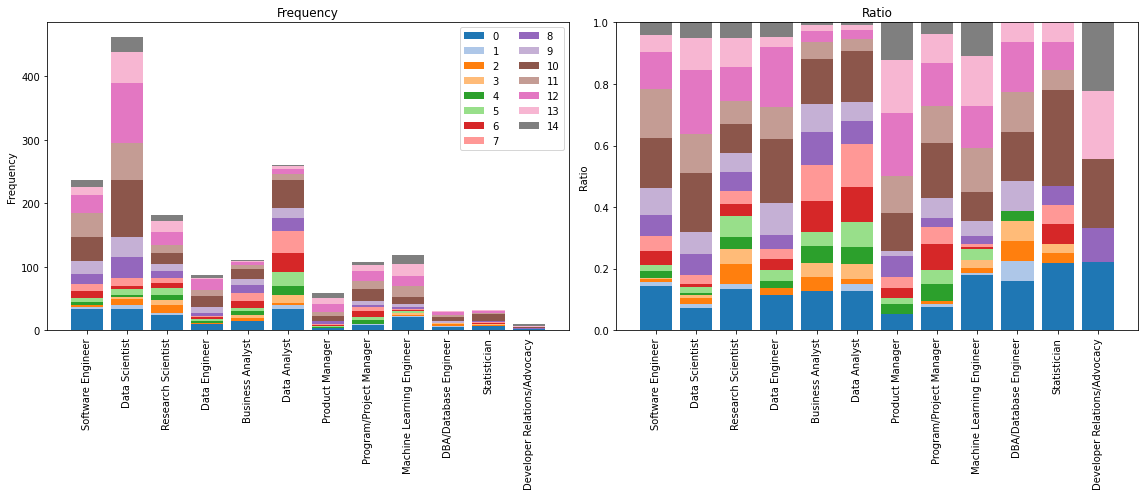

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7), tight_layout=True)
cmap = plt.get_cmap("tab20")

i   = 0 
for title, freq in salaryFreq.iteritems():
    stop    = salaryFreq.columns.get_loc(title)
    # plot the left figure
    ax[0].bar(jobTitles, freq, color=cmap(i), label=int(salaryBuckets[i]), bottom=salaryFreq.iloc[:, 0:stop].sum(axis=1))
    # plot the right figure
    ax[1].bar(jobTitles, salaryFreqRatio[i], color=cmap(i), bottom=salaryFreqRatio.iloc[:, 0:stop].sum(axis=1))
    # add 1 to the counter
    i  += 1

ax[0].set_title("Frequency")
ax[0].set_ylabel("Frequency")
ax[0].tick_params(axis="x", labelrotation= 90)
ax[0].legend(loc="upper right", ncol=2)
ax[1].set_title("Ratio")
ax[1].set_ylabel("Ratio")
ax[1].tick_params(axis="x", labelrotation= 90)

fig.savefig("salaryBarPlotParJobTitle.png")

Q7 What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python

In [ ]:
listQ7=[]
for column in cleaned.columns:
    if 'Q7' in column:
        listQ7.append(column)

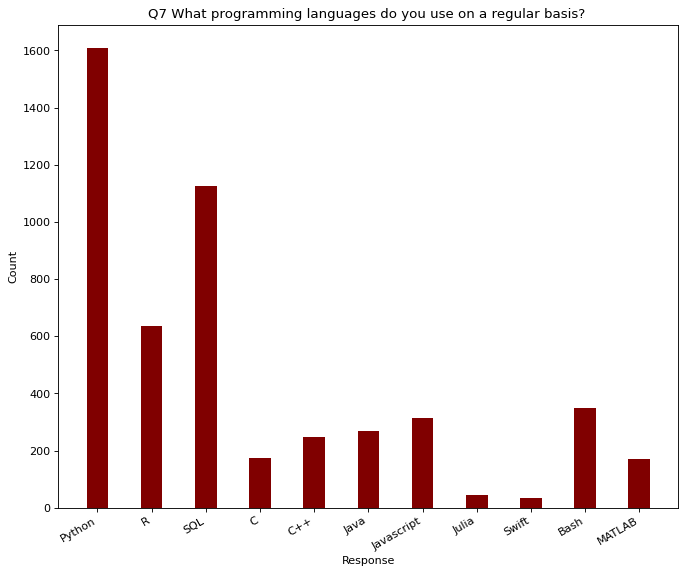

In [ ]:
count=[]
answers=[]
for i in listQ7:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title("Q7 What programming languages do you use on a regular basis? ")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

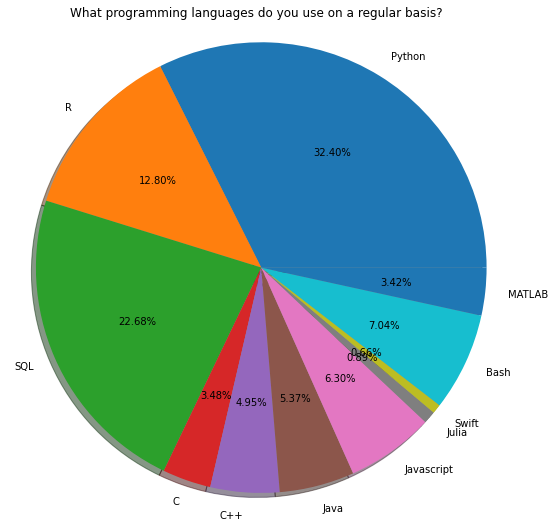

In [ ]:
count=np.array(count)
count_percent=count/np.sum(count)


# Draw the pie chart 


fig, ax = plt.subplots(figsize = (9,9))

ax.pie(count_percent, labels = answers, autopct='%1.2f%%', shadow = True)
ax.axis('equal')
plt.title('What programming languages do you use on a regular basis? ')
plt.show()

Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?

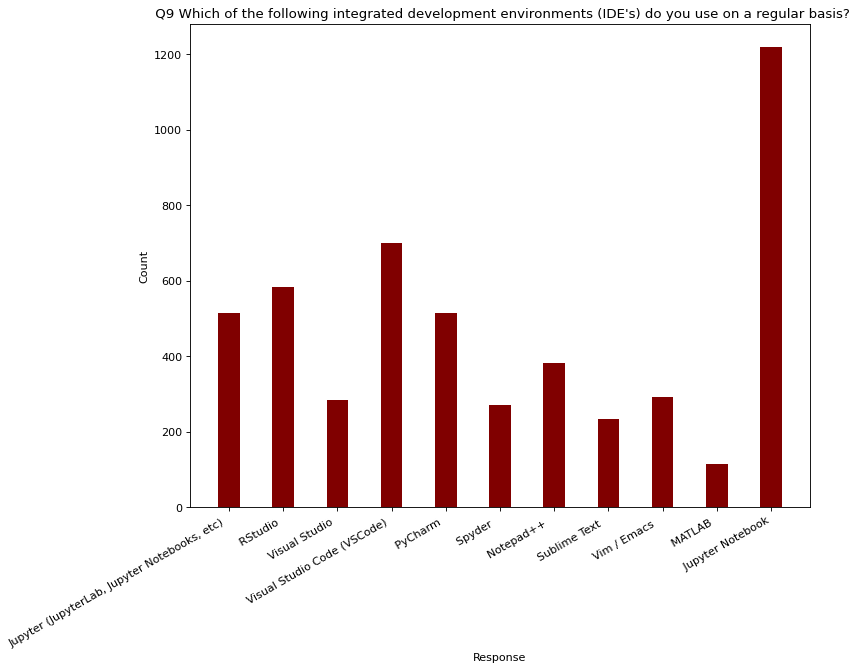

In [ ]:
listQ9=[]
for column in cleaned.columns:
    if 'Q9' in column:
        listQ9.append(column)


count=[]
answers=[]
for i in listQ9:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title(" Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

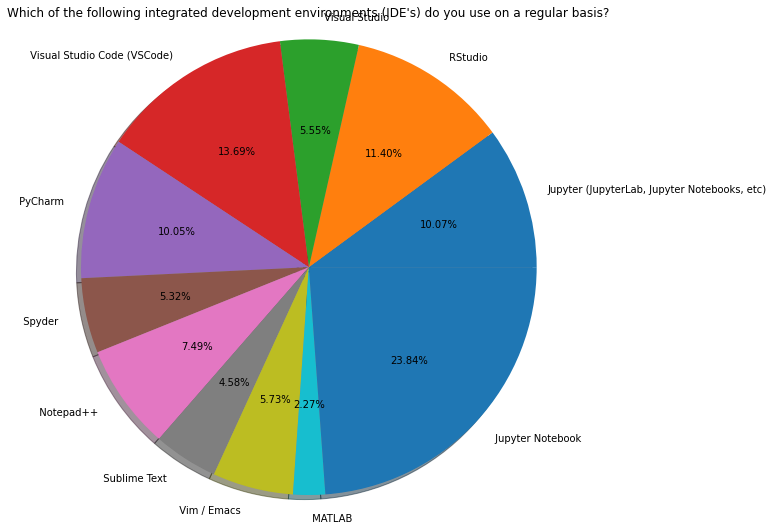

In [ ]:
count=np.array(count)
count_percent=count/np.sum(count)


# Draw the pie chart 


fig, ax = plt.subplots(figsize = (9,9))

ax.pie(count_percent, labels = answers, autopct='%1.2f%%', shadow = True)
ax.axis('equal')
plt.title("Which of the following integrated development environments (IDE's) do you use on a regular basis?")
plt.show()

Q10 Which of the following hosted notebook products do you use on a regular basis? 

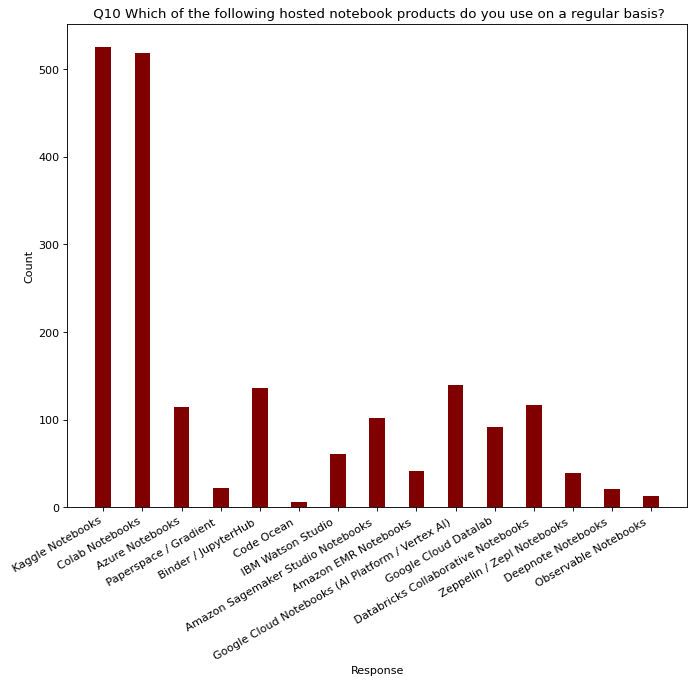

In [ ]:
listQ10=[]
for column in cleaned.columns:
    if 'Q10' in column:
        listQ10.append(column)


count=[]
answers=[]
for i in listQ10:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title(" Q10 Which of the following hosted notebook products do you use on a regular basis?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

Q14 What data visualization libraries or tools do you use on a regular basis?  

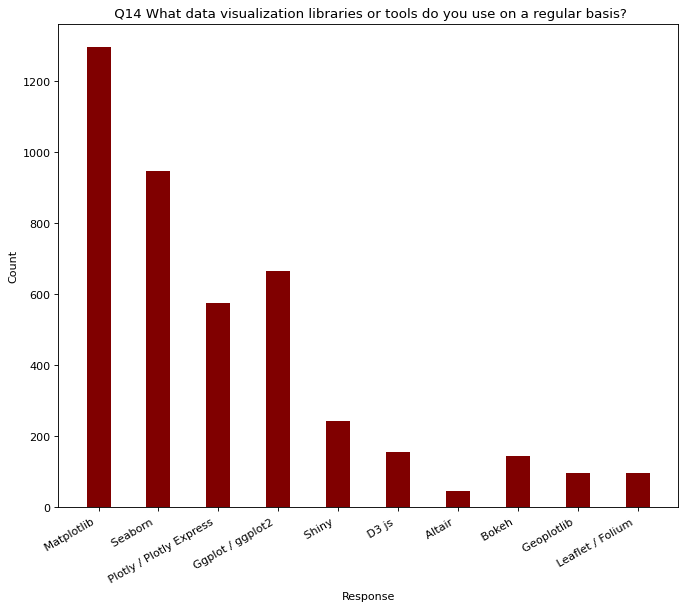

In [ ]:
listQ14=[]
for column in cleaned.columns:
    if 'Q14' in column:
        listQ14.append(column)


count=[]
answers=[]
for i in listQ14:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title(" Q14 What data visualization libraries or tools do you use on a regular basis?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

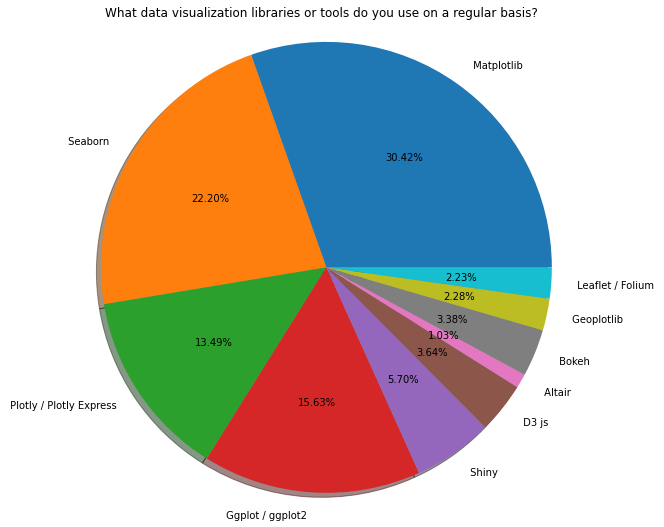

In [ ]:
count=np.array(count)
count_percent=count/np.sum(count)


# Draw the pie chart 


fig, ax = plt.subplots(figsize = (9,9))

ax.pie(count_percent, labels = answers, autopct='%1.2f%%', shadow = True)
ax.axis('equal')
plt.title('What data visualization libraries or tools do you use on a regular basis? ')
plt.show()

Q16 Which of the following machine learning frameworks do you use on a regular basis?

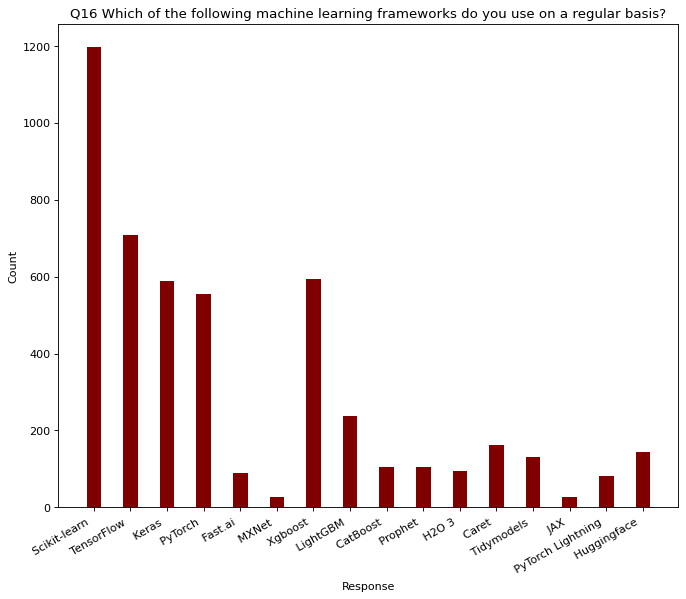

In [ ]:
listQ16=[]
for column in cleaned.columns:
    if 'Q16' in column:
        listQ16.append(column)


count=[]
answers=[]
for i in listQ16:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title("Q16 Which of the following machine learning frameworks do you use on a regular basis?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

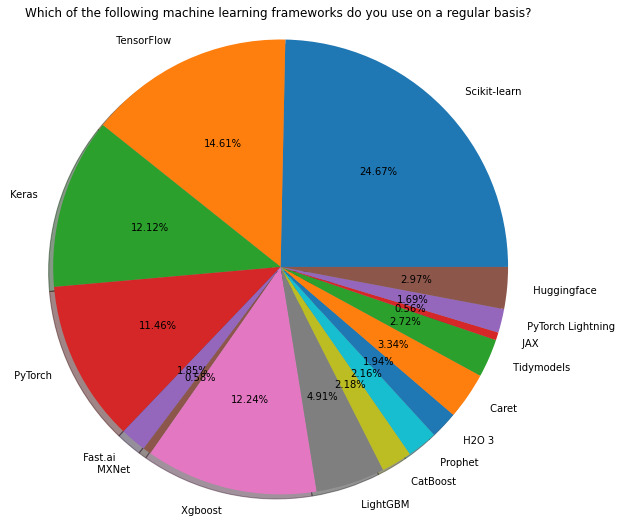

In [ ]:
count=np.array(count)
count_percent=count/np.sum(count)


# Draw the pie chart 


fig, ax = plt.subplots(figsize = (9,9))

ax.pie(count_percent, labels = answers, autopct='%1.2f%%', shadow = True)
ax.axis('equal')
plt.title('Which of the following machine learning frameworks do you use on a regular basis? ')
plt.show()

Q17 Which of the following ML algorithms do you use on a regular basis?

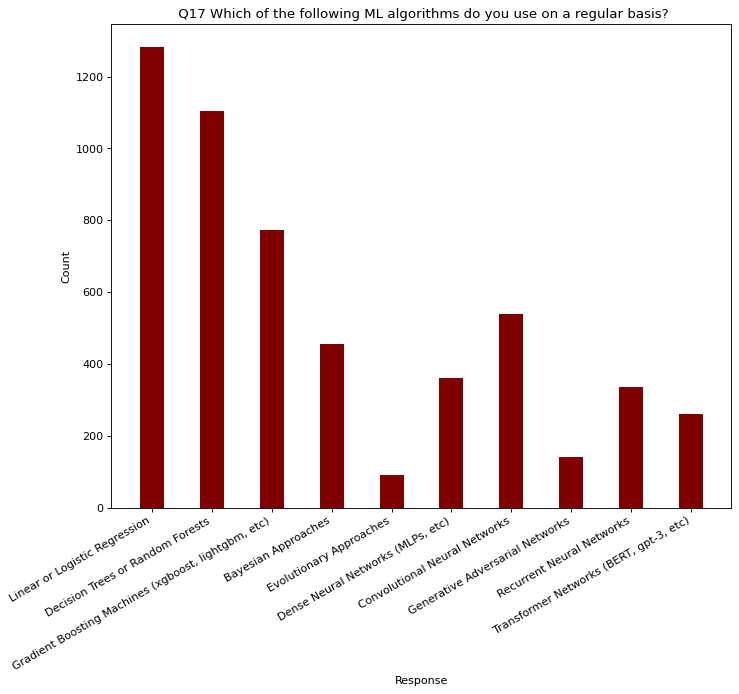

In [ ]:
listQ17=[]
for column in cleaned.columns:
    if 'Q17' in column:
        listQ17.append(column)


count=[]
answers=[]
for i in listQ17:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title(" Q17 Which of the following ML algorithms do you use on a regular basis?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

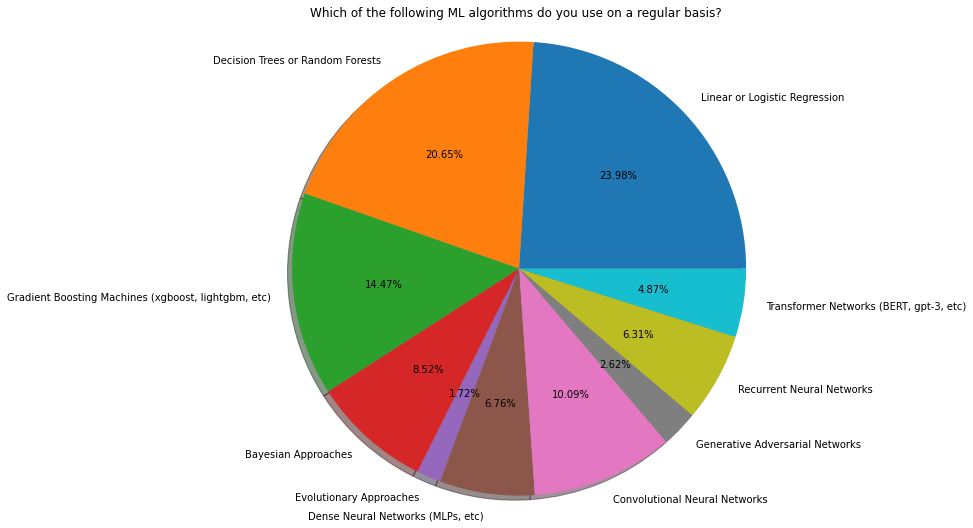

In [ ]:
count=np.array(count)
count_percent=count/np.sum(count)


# Draw the pie chart 


fig, ax = plt.subplots(figsize = (9,9))

ax.pie(count_percent, labels = answers, autopct='%1.2f%%', shadow = True)
ax.axis('equal')
plt.title('Which of the following ML algorithms do you use on a regular basis? ')
plt.show()

Q24 Select any activities that make up an important part of your role at work?

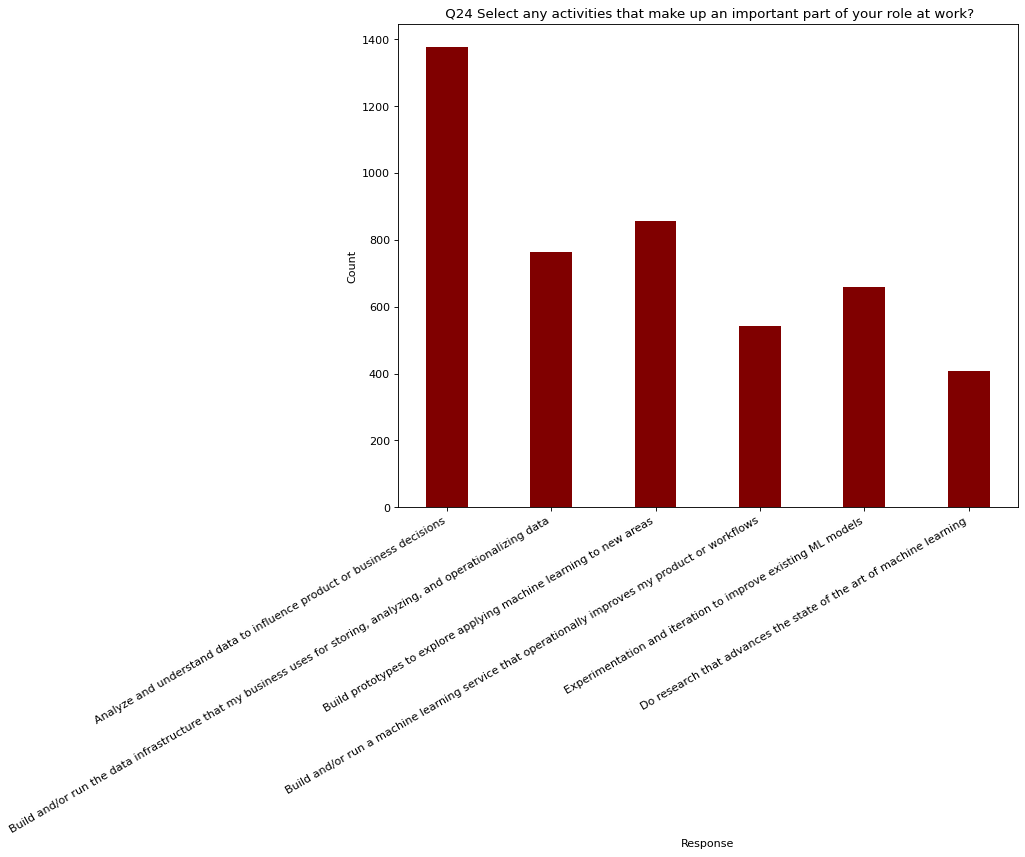

In [ ]:
listQ24=[]
for column in cleaned.columns:
    if 'Q24' in column:
        listQ24.append(column)


count=[]
answers=[]
for i in listQ24:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title(" Q24 Select any activities that make up an important part of your role at work?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

Q27 Which of the following cloud computing platforms do you use on a regular basis?

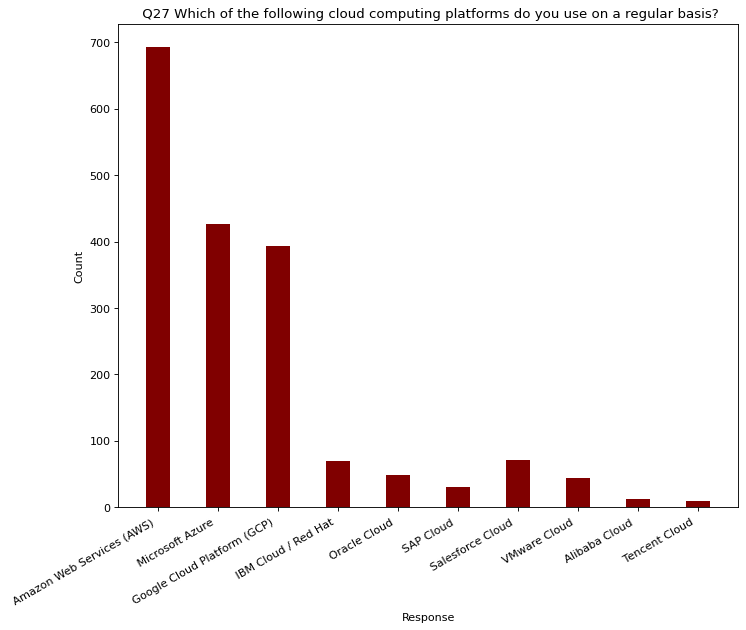

In [ ]:
listQ27=[]
for column in cleaned.columns:
    if 'Q27' in column:
        listQ27.append(column)


count=[]
answers=[]
for i in listQ27:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title(" Q27 Which of the following cloud computing platforms do you use on a regular basis?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

Q32 Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? 

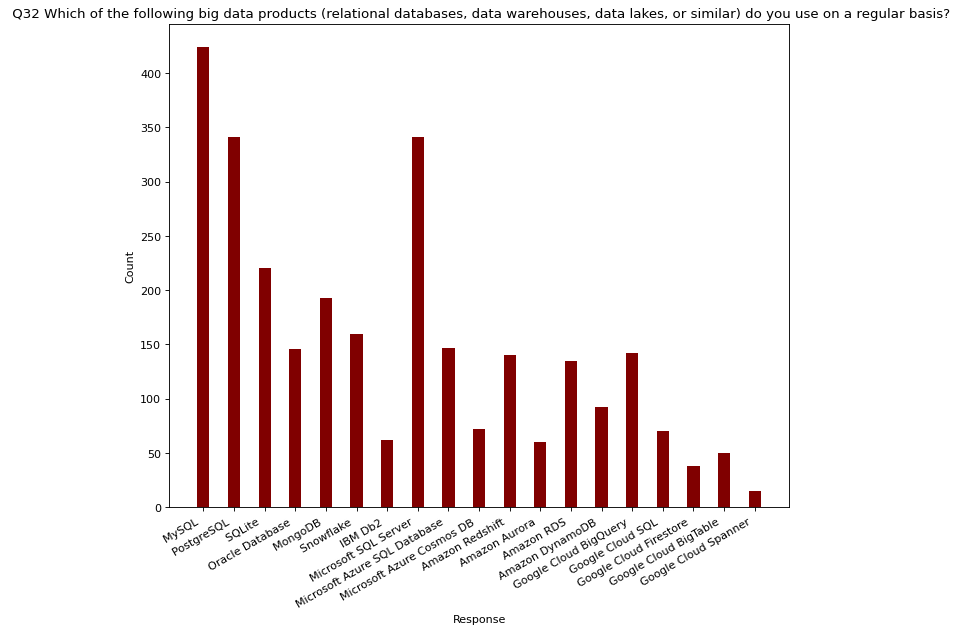

In [ ]:
listQ32=[]
for column in cleaned.columns:
    if 'Q32' in column:
        listQ32.append(column)


count=[]
answers=[]
for i in listQ32:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title(" Q32 Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

Q36 Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? 

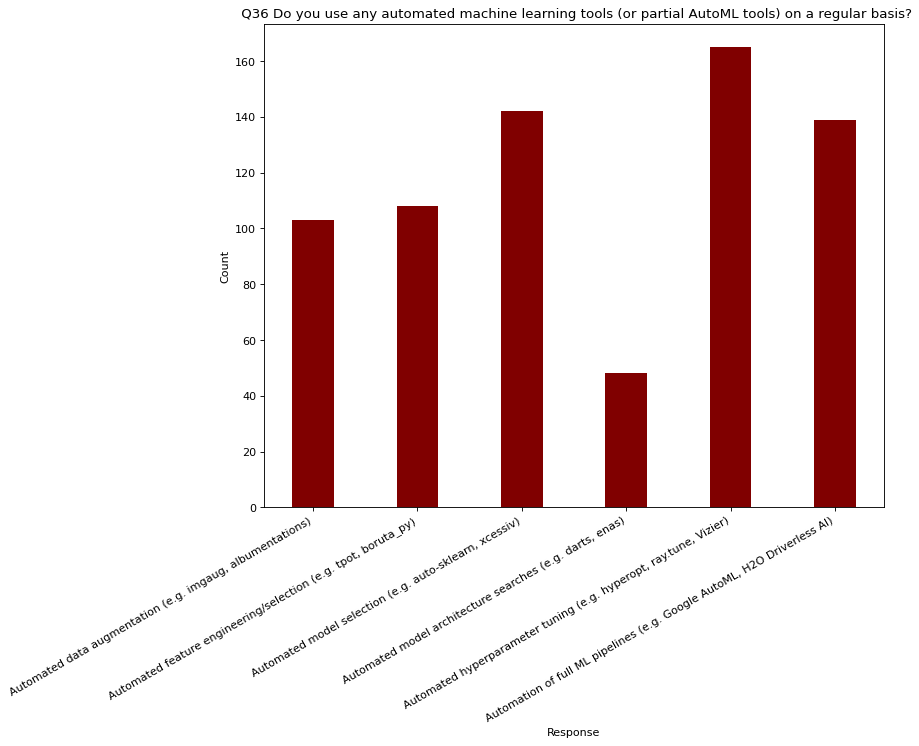

In [ ]:
listQ36=[]
for column in cleaned.columns:
    if 'Q36' in column:
        listQ36.append(column)


count=[]
answers=[]
for i in listQ36:
  count.append(cleaned[i].notna().sum())
  answers.append(cleaned[i].loc[cleaned[i].first_valid_index()])

plt.figure(figsize=(10, 8), dpi=80)
plt.bar(answers, count, color ='maroon',
        width = 0.4)
plt.xticks(rotation=30, ha='right')
plt.title(" Q36 Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

Q8 What programming language would you recommend an aspiring data scientist to learn first?

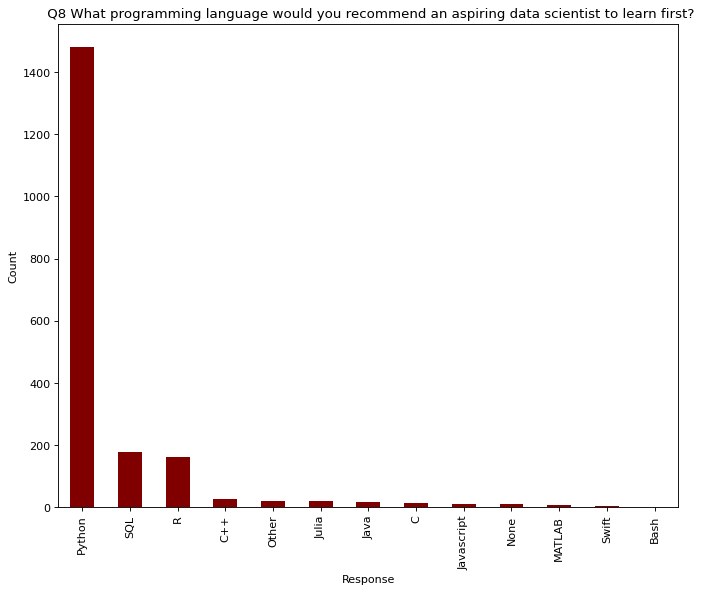

In [ ]:
Q8_response=cleaned["Q8"].value_counts()
plt.figure(figsize=(10, 8), dpi=80)
plt.title(" Q8 What programming language would you recommend an aspiring data scientist to learn first?")
plt.xlabel("Response")
plt.ylabel("Count")
Q8_response.plot(kind="bar", color ='maroon')


Q22 Approximately how many individuals are responsible for data science workloads at your place of business?

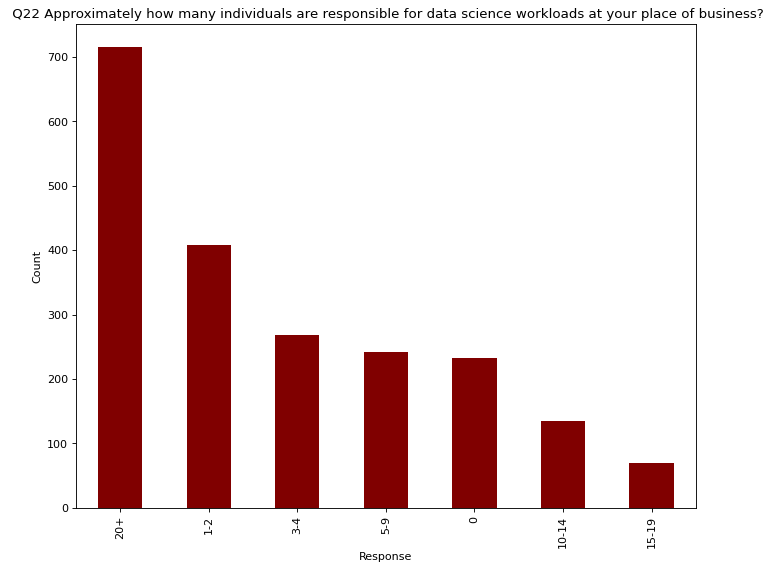

In [ ]:
Q22_response=cleaned["Q22"].value_counts()
plt.figure(figsize=(10, 8), dpi=80)
plt.title(" Q22 Approximately how many individuals are responsible for data science workloads at your place of business?")
plt.xlabel("Response")
plt.ylabel("Count")
Q22_response.plot(kind="bar", color ='maroon')

## Create heatmaps describing the relation between job titles and skills and tools

In [ ]:
def createPivotTab(questions):
    df      = pd.DataFrame()#.atype("float32")
    answers = []
    for title in jobTitles:
        mask    = cleaned["Q5"] == title
        counts  = []
        for q in questions.columns:
            if len(answers) < len(questions.columns):
                answers.append(questions[q].value_counts().index[0])
            counts.append(cleaned.loc[mask, q].notna().sum())

        df[title] = counts

    df  = df.set_axis(answers, axis=0)

    return df

In [ ]:
def normalizedHeatmap(df, ax=None, saveAs=None):
    scaler  = MinMaxScaler()
    pivot   = createPivotTab(df)
    normalized  = pd.DataFrame(scaler.fit_transform(pivot), columns=pivot.columns, index=pivot.index)
    fig = sns.heatmap(normalized, ax=ax).get_figure()

    if saveAs is not None:
        fig.savefig(saveAs)

In [ ]:
def drawHeatMaps(df):
    fig, axes   = plt.subplots(1, 2, tight_layout=True, sharey="row")

    pivot   = createPivotTab(df)
    sns.heatmap(pivot, ax=axes[0], square=True, cbar=False, annot=True, fmt="d").set(title="Frequency")
    normalizedHeatmap(df, axes[1])

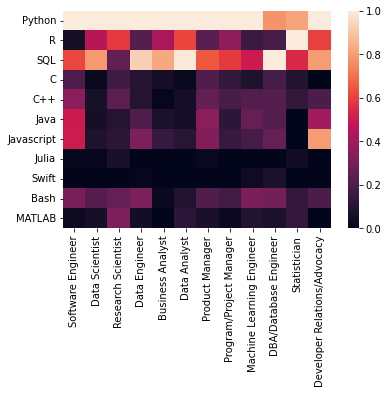

In [ ]:
# Q7 What programming languages do you use on a regular basis? (Select all that apply)
normalizedHeatmap(cleaned.filter(like="Q7"), saveAs="07_codeLang.png")

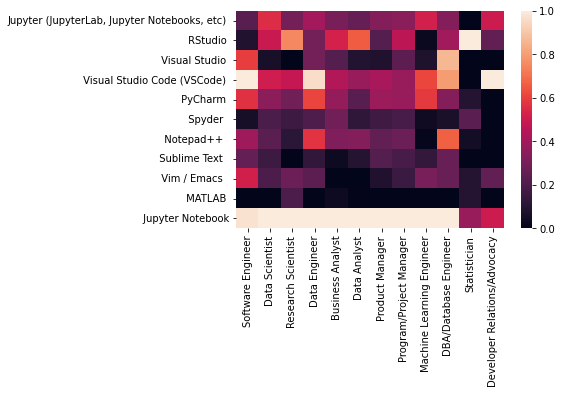

In [ ]:
# Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply)
normalizedHeatmap(cleaned.filter(like="Q9"), saveAs="09_IDE.png")

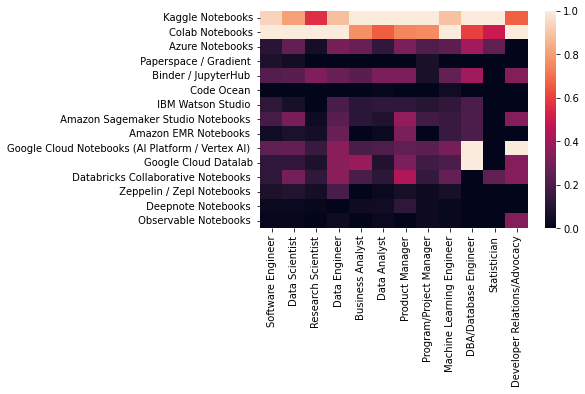

In [ ]:
# Q10 Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) 
normalizedHeatmap(cleaned.filter(like="Q10"), saveAs="10_notebookProd.png")

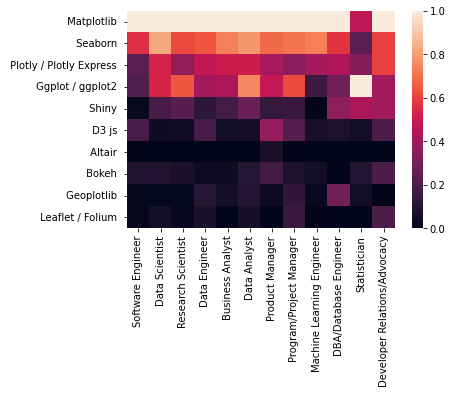

In [ ]:
# Q14 What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) 
normalizedHeatmap(cleaned.filter(like="Q14"), saveAs="14_VisTool.png")

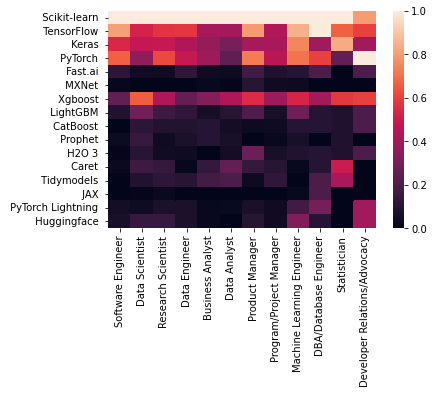

In [ ]:
# Q16 Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) 
normalizedHeatmap(cleaned.filter(like="Q16"), saveAs="16_MLFramework.png")

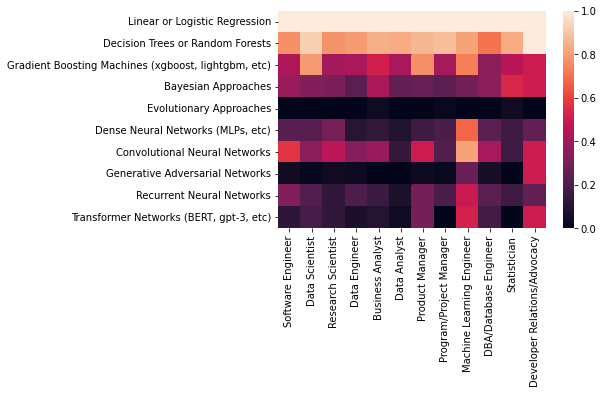

In [ ]:
# Q17 Which of the following ML algorithms do you use on a regular basis? (Select all that apply): 
normalizedHeatmap(cleaned.filter(like="Q17"), saveAs="17_MLAlgo.png")

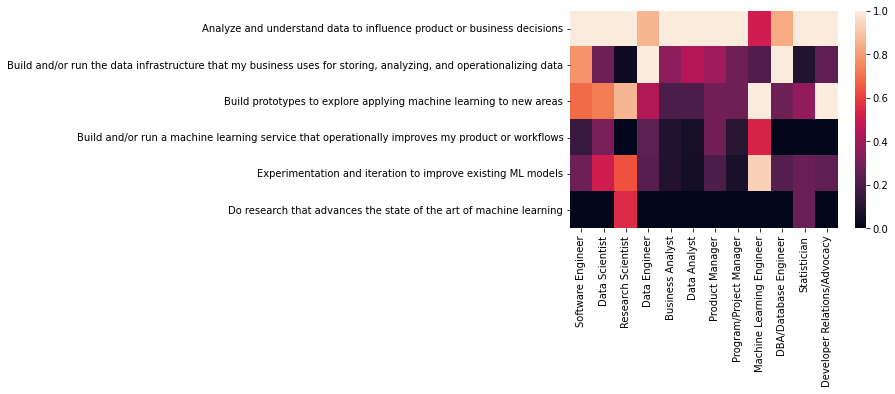

In [ ]:
# Q24 Select any activities that make up an important part of your role at work: (Select all that apply) 
normalizedHeatmap(cleaned.filter(like="Q24"), saveAs="24_taskAtWork.png")

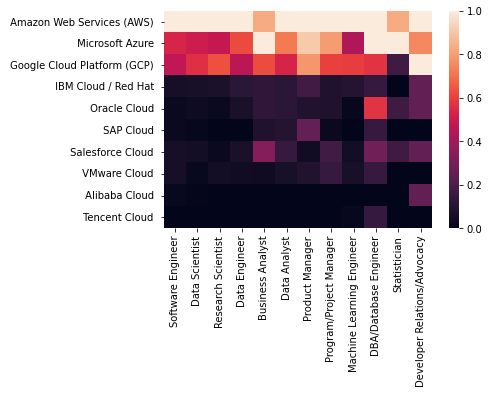

In [ ]:
# Q27 Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) 
normalizedHeatmap(cleaned.filter(like="Q27"), saveAs="26_cloudPlatform.png")

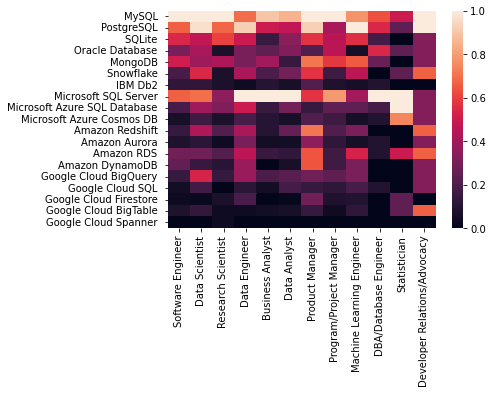

In [ ]:
# Q32 Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)  
normalizedHeatmap(cleaned.filter(like="Q32"), saveAs="32_bigDataSvc.png")

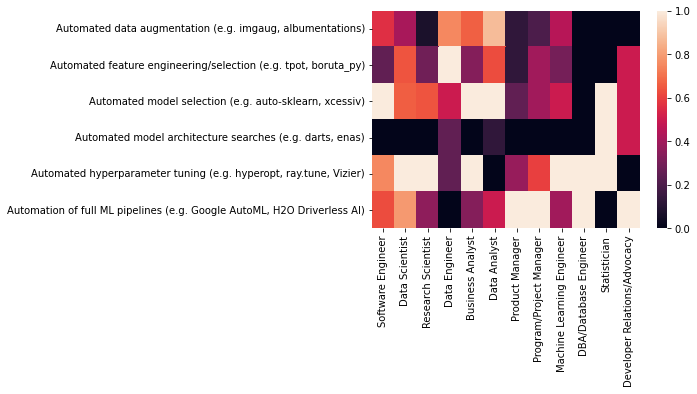

In [ ]:
# Q36 Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)7 
normalizedHeatmap(cleaned.filter(like="Q36"), saveAs="36_autoMLProd.png")

# Evaluate a statistical significance retrieved from each answer choice of select-all multiple answer choice questions.

In [ ]:
targetQuestions = ["Q7", "Q9", "Q10", "Q14", "Q16", "Q17", "Q24",  "Q27", "Q32",  "Q36"] 


# Mann-Whitney U-test

In [ ]:
mwAns   = []
mwP     = []
ratio   = pd.Series(index=targetQuestions).astype("float32")

for question in targetQuestions:
    count   = 0
    answerGroup = cleaned.filter(like=question)
    for answer in answerGroup:
        mwAns.append(answer)
        # mann-whitney's u test
        negMask     = cleaned[answer].isna()
        negSample   = cleaned.loc[negMask, "Q25_Encoded"]
        posSample   = cleaned.loc[~negMask, "Q25_Encoded"]
        U, p        = stats.mannwhitneyu(negSample, posSample)
        mwP.append(p)
        if p < 0.05:    # no processing: 237 -> r>0.2: 2, p<0.05: 177, p<0.01: 367
            count  += 1

    ratio[question]    = count/len(answerGroup.columns)

ratio   = ratio.sort_values(ascending=False)
#ratio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Significant answer choice ratio')

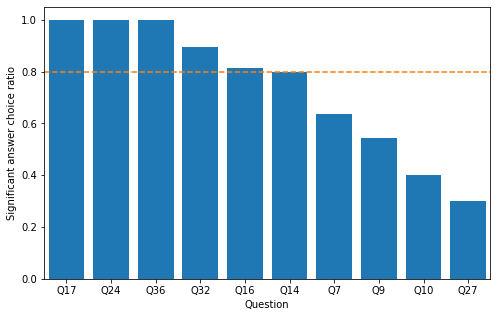

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

plotRange   = [-0.5, len(ratio)-0.5]
ax.bar(ratio.index, ratio.values)
ax.hlines([0.8], plotRange[0], plotRange[1], colors=["tab:orange"], linestyles="dashed")
ax.set_xlim(plotRange)
ax.set_xlabel("Question")
ax.set_ylabel("Significant answer choice ratio")